In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Get_groups import phase_diagram
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm

In [6]:
N = 500
seed = 10
m = 6


In [30]:
dt = 0.05

In [9]:
Ks = np.arange(0,10+0.1/2,0.1)
df = pd.DataFrame({'r':[0],'rstd':[0],'g1':[0],'g2':[0],'g3':[0],'g4':[0],'g5':[0]
                   ,'g1_std':[0],'g2_std':[0],'g3_std':[0],'g4_std':[0],'g5_std':[0],'dt' : [dt],'K':Ks[0],'m':m})
df_Km = df.set_index(['K','m','dt'])

In [38]:
dt = 0.05
P_ = phase_diagram(seed = seed,N = N,m = m, t_end = 1000,dt = dt)

In [39]:
for K,test in zip(Ks,parmap.map(P_.make_meanr,Ks,sum_time =500, pm_pbar=False, pm_processes=8)):
    r,rstd,g,gstd =test
    temp = [r,rstd,*g,*gstd]
    df_Km.loc[(K,m,dt),:]=temp

In [25]:
Draw_ = DD(m)

In [13]:
A = df_Km.reset_index()

In [14]:
A[A.dt == 0.01]

,K,m,dt,r,rstd,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std


In [41]:
df_Km

,,,r,rstd,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std
K,m,dt,,,,,,,,,,,,
0.0,6,0.10,0.042868,0.020789,23.000,23.000,21.000,17.000,15.000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,6,0.10,0.042658,0.021483,23.000,23.000,21.000,17.420,15.334,0.000000,0.000000,0.000000,0.493559,1.440293
0.2,6,0.10,0.042111,0.022073,24.652,23.000,21.000,17.090,15.440,2.972355,0.000000,0.000000,1.281366,1.498800
0.3,6,0.10,0.040262,0.022561,25.646,22.628,20.208,15.702,14.108,3.394213,0.778213,1.733417,1.503727,0.469400
0.4,6,0.10,0.037049,0.023378,23.802,19.236,16.522,14.288,13.464,3.238332,2.755414,2.231035,0.716279,0.872183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,6,0.01,0.869661,0.018763,449.000,16.000,8.000,5.000,3.492,0.000000,0.000000,0.000000,0.000000,0.861357
9.7,6,0.01,0.886980,0.024389,453.000,15.000,8.000,3.438,3.000,0.000000,0.000000,0.000000,0.496141,0.000000
9.8,6,0.01,0.894760,0.013024,457.000,11.000,8.000,3.000,3.000,0.000000,0.000000,0.000000,0.000000,0.000000


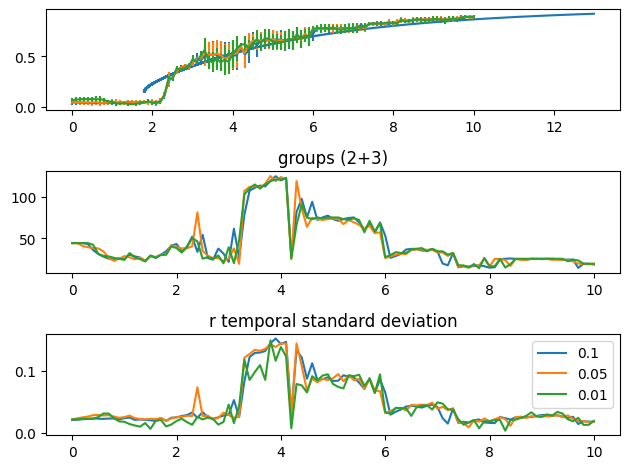

In [45]:
plt.figure()
plt.subplot(311)
Draw_.foward()
for i,dt in enumerate([0.1,0.05,0.01]):
    plt.subplot(311)

    r = df_Km.unstack().r.to_numpy().T[i]
    rstd = df_Km.unstack().rstd.to_numpy().T[i]
    g23 = df_Km.unstack().g2.to_numpy().T[i] + df_Km.unstack().g3.to_numpy().T[i]

    plt.errorbar(Ks,r,rstd,label = f'{dt}')
    # plt.plot(Ks,r,label = f'{dt}')
    plt.subplot(312)
    plt.plot(Ks,g23,label = f'{dt}')
    plt.subplot(313)
    plt.plot(Ks,rstd,label = f'{dt}')
plt.subplot(312)
plt.title('groups (2+3)')
plt.subplot(313)

plt.title('r temporal standard deviation')
plt.legend()
plt.tight_layout()